## Basic Classification

对 fashion mnist 进行基本的分类。

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Have a look of our data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

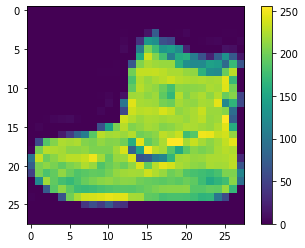

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

上面的数据是彩色的，我们需要对数据进行归一化处理，即将每个元素的值缩小 到 `[0, 1]` 之间, 然后将其馈送到神经网络模型中。

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
def random_plot_images25(images, labels):
    "Random plot 25 fashion_mnist images"
    
    ilist = np.random.permutation(range(len(images)))
    
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.6, wspace=0.1)
    
    for i in range(1, 26):
        ax = fig.add_subplot(5, 5, i)
        ax.imshow(images[ilist[i]], cmap = plt.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.xlabel(class_names[labels[ilist[i]]])
    plt.show()

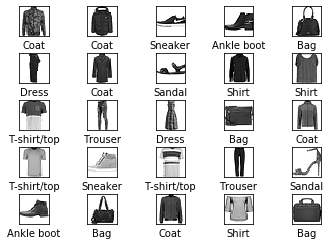

In [50]:
random_plot_images25(train_images, train_labels)

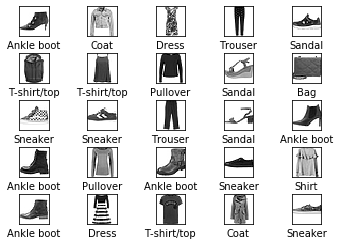

In [51]:
random_plot_images25(test_images, test_labels)

### 构建模型

构建神经网络先设置模型的层，然后再编译模型。我们的模型如下：

[784, 128, 128, 10] 

- 输入层为 784,
- 2个隐藏层为 128 （Dense, 全连接）
- 输出层 10

In [52]:
# 构建模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### 编译模型

除了上面的层设置，我们还需要在模型中指定，
- 损失函数(loss function),
- 优化器(Optimizer 如：Adam, Momentum, RMProps 等) TensorFlow 实现了很多 [Optimizer](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers).
- 指标 (Metrics).

In [56]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 训练模型

使用 `model.fit` 进行拟合。

In [58]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4860 - accuracy: 0.8255
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3620 - accuracy: 0.8660
Epoch 3/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3283 - accuracy: 0.8795
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3030 - accuracy: 0.8875
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2877 - accuracy: 0.8927


### 模型评估

接下来，比较一下模型下测试数据集上的表现。

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)



10000/10000 [==============================] - 0s 49us/sample - loss: 0.3407 - accuracy: 0.8792
Test accuracy: 0.8792


结果表明，模型在测试数据集上的准确率略低于训练数据集上的准确率。这说明在存在过拟合的情况。如果模型上新数据的表现不如训练数据上的表现，就表示过拟合 (Overfit).

### 模型预测

模型经过训练后，我对图像进行预测。


In [62]:
predictions = model.predict(test_images)

In [63]:
predictions[0]

array([2.0425648e-07, 4.0263950e-07, 9.5110273e-08, 3.4952313e-07,
       4.1915422e-07, 9.3758065e-04, 1.0376799e-06, 9.7216610e-03,
       1.4214067e-05, 9.8932403e-01], dtype=float32)

因为最后一层使用的是 softmax 函数，我们需要找出置信度最大的值。

In [67]:
label = np.argmax(predictions[0])
print(label, class_names[label], class_names[test_labels[0]])

9 Ankle boot Ankle boot


##### 尝试将 10 个通道的值都绘制出来

In [76]:
def plot_image(i, predictions_arr, true_label, img):
    predictions_arr, true_label, img = predictions_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_arr)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(
        "{} {:2.0f}% ({})" .format(
            class_names[predicted_label], 
            100 * np.max(predictions_arr),
            class_names[true_label]
        ),
        color=color
    )

def plot_value_arr(i, predictions_arr, true_label):
    predictions_arr, true_label = predictions_arr[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_arr, color="#777777")
    plt.ylim(0, 1)
    predictions_label = np.argmax(predictions_arr)

    thisplot[predictions_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

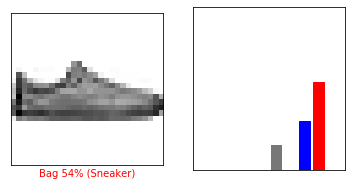

In [80]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_arr(i, predictions, test_labels)

In [98]:
def random_plot_predictions():
    ilist = np.random.permutation(range(len(test_images)))
    
    plt.figure(figsize=(20,15))
    
    for i in range(5):
        index = ilist[i]
        plt.subplot(5, 2, i * 2 + 1)
        plot_image(index, predictions, test_labels, test_images)
        plt.subplot(5, 2, i * 2 + 2)
        plot_value_arr(index, predictions, test_labels)
    

红色是预测错误，绿色是预测正确。可以看到最大置信度也有可能是错的。

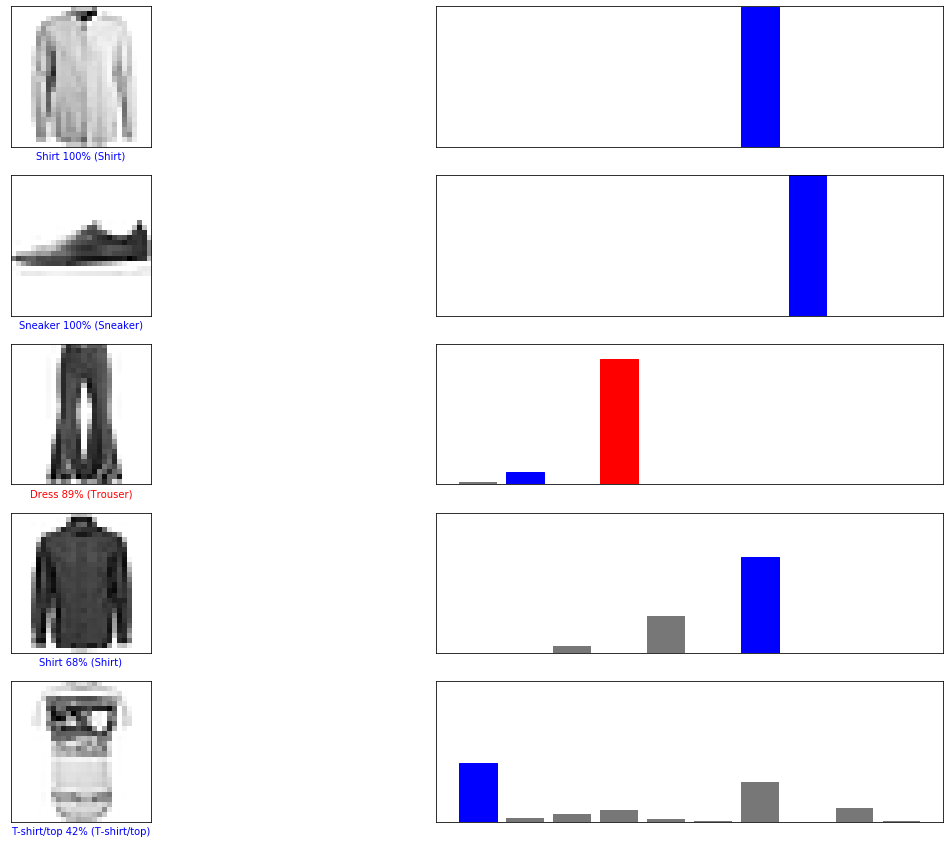

In [99]:
random_plot_predictions()

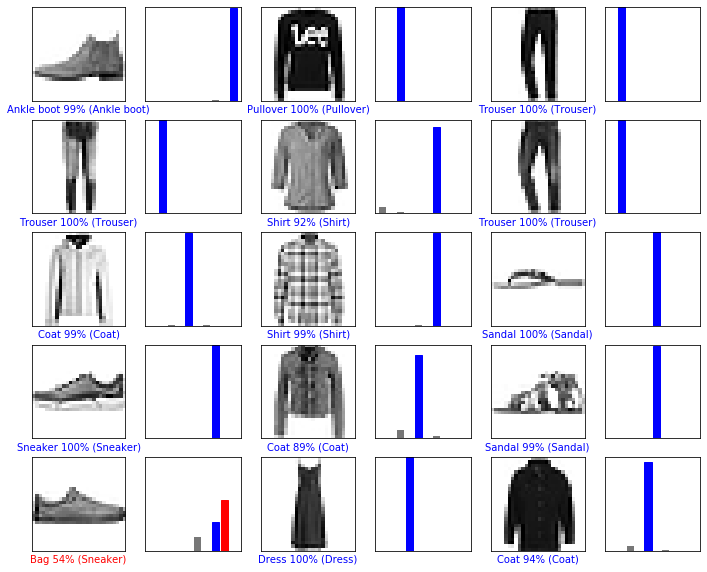

In [103]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_arr(i, predictions, test_labels)

### 最后对单个图像进行预测

`tf.keras` 训练后的模型可以对样本集进行批量预测。所以即使我们对单个图像进行预测时，也需要将其加入到批量中去。

In [109]:
img = test_images[0]
img.shape

(28, 28)

In [110]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [115]:
predictions_single = model.predict(img)

print(predictions_single)

np.argmax(predictions_single[0])

[[2.0425568e-07 4.0263870e-07 9.5110089e-08 3.4952180e-07 4.1915345e-07
  9.3757972e-04 1.0376770e-06 9.7216470e-03 1.4214039e-05 9.8932403e-01]]


9

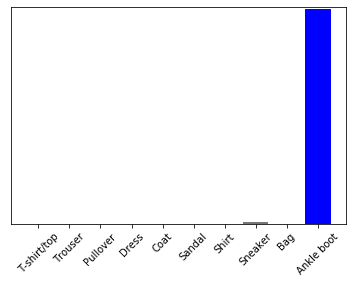

In [116]:
plot_value_arr(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)